#PHASE 1: Dataset Creation
In this first part, a new dataset will be created starting from one found on the Internet, modifying it for educational purposes. The goal is to generate a dataset for binary classification. More specifically, we wish to predict whether a potential future customer based on personal data such as age, gender, income, residence, years of stay, and marital status will be inclined to make purchases from the company in question, without specifying the type of product they will buy.


In [1]:
# Importing necessary packages during this first modification phase.
import pandas as pd
import random

In [2]:
# Load the DataFrame from the CSV file
df = pd.read_csv('/content/train-originale.csv')

# Elimination of superfluous columns
df = df.drop(['Product_ID', 'Product_Category_1','Product_Category_2','Product_Category_3', 'Purchase'], axis=1)

Let's observe if Python has removed the desired columns using the columns attribute of df.

In [3]:
df.columns

Index(['User_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status'],
      dtype='object')

Data preparation phase for the machine training part.

In [4]:
# Mapping values of the 'Gender' column so that males are classified as 1 and females as 0.
mappa_valori = {'M': 1, 'F': 0}
df['Gender'] = df['Gender'].map(mappa_valori)

# We use factorize to map unique values of the 'Age' column
# so that a number ranging from 0 to 6 corresponds to each 'Age' class.
# The class numbering is as follows: 0-17 = 0, 18-25 = 6, 26-35 = 2, 36-45 = 5, 46-50 = 3, 51-55 = 4, 55+ = 1.
df['Age'], _ = pd.factorize(df['Age'])

# Mapping for the 'City_Category' column so that classification A becomes 1, B becomes 2, and C becomes 3.
mappa_valori1 = {'A': 1, 'B': 2, 'C': 3}
df['City_Category'] = df['City_Category'].map(mappa_valori1)

# The only modification made for this column is the truncation for all people who have been
# residents in a certain city for more than 4 years; for simplicity, we rounded it to 4.
mappa_valori2 = {'0': 0,'1': 1,'2': 2,'3': 3,'4+': 4}
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].map(mappa_valori2)

Let's visualize the preprocessed dataset with the values attribute to check if our data has been transformed correctly.


In [5]:
df.values

array([[1000001,       0,       0, ...,       1,       2,       0],
       [1000001,       0,       0, ...,       1,       2,       0],
       [1000001,       0,       0, ...,       1,       2,       0],
       ...,
       [1000360,       1,       5, ...,       3,       1,       0],
       [1000361,       0,       2, ...,       2,       3,       0],
       [1000362,       1,       5, ...,       2,       1,       0]])

If we observe the dataset closely, we can note that the 'User_ID' and its related characteristics often repeat. This means that a specific customer has purchased multiple times from the company in the past; consequently, they are given more importance by repeating their ID every time they purchased something.
_____________

Now it is time to implement the "true function," which will constitute the output during the learning phase. This function will vary based on the different characteristics of each customer.

It is relevant to note two actions taken for the 'Occupation' characteristic. First, observing the df.describe (Phase 2 [11]) below, we notice the maximum value is 20. To prevent this factor from excessively influencing the true function, it was decided to divide it by 4. Furthermore, as highlighted in the variable description (Phase 2), many customers chose not to indicate their annual income. To make this variable as realistic as possible, we opted to implement a random factor (valid only in the true function): whenever a customer does not provide an answer, we attempt to approximate their value with a random number between 2 and 14 (interquartile range between the first and third), to create the most realistic dataset possible.

Finally, a random factor varying from 0 to 6 was introduced so that the machine cannot perfectly decipher the function. The sum of every characteristic, combined with the variable part, will have a maximum value of 26.

Once the score sum is calculated, it is normalized. If the result is greater than 0.67, our output function will indicate that the customer will definitely buy any product from the studied company.

Terminato il calcolo della somma dei punteggi, questa viene normalizzata. Se il risultato ottenuto è superiore a 0.67, allora la nostra funzione di output ci indicherà che il cliente comprerà sicuramente un qualsiasi prodotto dell'azienda studiata.

In [6]:
def true_function(row):
    numero_casuale = random.randint(0, 6)

    # If Occupation is equal to 0 (i.e., the customer did not answer the annual salary question), assign a random value in the range of 2 to 14
    # (these values were chosen so that all 0 values fall within the interquartile range between 25% and 75%).
    occupation_value = row['Occupation'] if row['Occupation'] != 0 else random.randint(2, 14)

    score = (row['Gender'] + row['Age'] + occupation_value/4 + row['City_Category'] + row['Stay_In_Current_City_Years'] + row['Marital_Status'] + numero_casuale)/26
    return 1 if score > 0.67 else 0

# Adding the newly calculated column to the database.
df['Purchase'] = df.apply(true_function, axis=1)

Let's observe if Python has added the newly calculated column.

In [7]:
df.columns

Index(['User_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Purchase'],
      dtype='object')

Saving the dataset to be used in the second phase.

In [8]:
df.to_csv('dati_modificati_con_prediction.csv', index=False)

----------------
----------------
# PHASE 2: Descriptive Analysis

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In this Phase, we will analyze our new saved data and compare individual variables against the dataset output ('Purchase').



#### Variable Description

After the modifications in the first phase, we now have the new dataset on which this Machine Learning exercise will be based.
| Variable | Description |
|---|---|
| **User_ID** | Unique code linked to every customer who registers with the company. |
| **Gender** | Dichotomous value corresponding to the customer's gender. |
| **Age** | Age divided into classes with a corresponding identification number: $[0;17]=0$, $[18;25]=6$, $[26;35]=2$, $[36;45]=5$, $[46;50]=3$, $[51;55]=4$, $]55;100]=1$. |
| **Occupation** | Value of the customer's gross annual income divided by 5,000. The value 0 occurs when this question is not filled out in the questionnaire. |
| **City_Category** | Customer's city of residence. |
| **Stay_In_Current_City_Years** | Customer's length of residence, value truncated to a maximum of 4 years. |
| **Marital_Status** | Dichotomous value corresponding to the customer's marital status. |
| **Purchase** | Dichotomous value indicating whether the customer has purchased any product from the company. **(Target Variable)** |

In [10]:
df = pd.read_csv('./dati_modificati_con_prediction.csv')

In [11]:
df.describe()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase
count,1.577570e+05,157757.000000,157757.000000,157757.000000,157757.000000,157757.000000,157757.000000,157757.000000
mean,1.002983e+06,0.753894,3.464791,8.065563,2.041627,1.860824,0.410258,0.153838
std,1.749968e+03,0.430743,1.761772,6.527194,0.759340,1.291887,0.491882,0.360794
min,1.000001e+06,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.001448e+06,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,1.003030e+06,1.000000,3.000000,7.000000,2.000000,2.000000,0.000000,0.000000
75%,1.004451e+06,1.000000,5.000000,14.000000,3.000000,3.000000,1.000000,0.000000
max,1.006040e+06,1.000000,6.000000,20.000000,3.000000,4.000000,1.000000,1.000000


In [12]:
df.shape

(157757, 8)

Observing df.shape and df.describe, we can note that there are no missing data in the .csv file, so it will not be necessary to delete superfluous rows.

Text(0.5, 1.0, 'Gender Distribution')

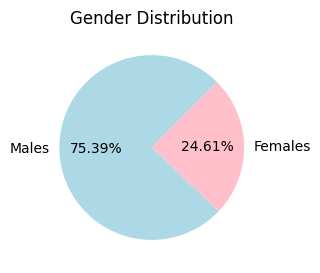

In [13]:
plt.subplots(figsize=(5, 3))

conteggio_categorie = df['Gender'].value_counts()

etichette_personalizzate = ['Males', 'Females']

plt.pie(conteggio_categorie, labels=etichette_personalizzate, autopct='%1.2f%%', startangle=45, colors=['lightblue', 'pink'])
plt.title('Gender Distribution')

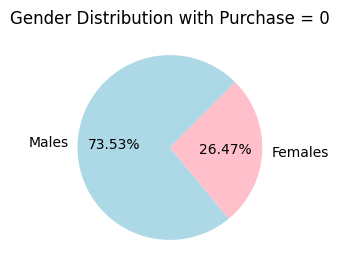

In [14]:
plt.subplots(figsize=(5, 3))

# Filter rows where 'Purchase' equals 0
df_purchase_0 = df[df['Purchase'] == 0]

# Calculate gender distribution only for cases where 'Purchase' equals 0
conteggio_genere = df_purchase_0['Gender'].value_counts()

plt.pie(conteggio_genere, labels=['Males','Females'], autopct='%1.2f%%', startangle=45, colors=['lightblue','pink'])
plt.title('Gender Distribution with Purchase = 0')
plt.show()

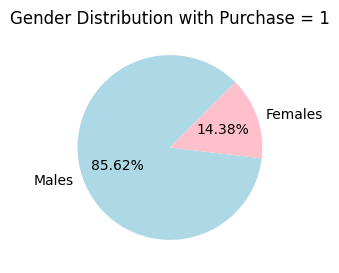

In [15]:
plt.subplots(figsize=(5, 3))

# Filter rows where 'Purchase' equals 1
df_purchase_1 = df[df['Purchase'] == 1]

# Calculate gender distribution only for cases where 'Purchase' equals 1
conteggio_genere = df_purchase_1['Gender'].value_counts()

# Create a pie chart
plt.pie(conteggio_genere, labels=['Males', 'Females'], autopct='%1.2f%%', startangle=45, colors=['lightblue', 'pink'])
plt.title('Gender Distribution with Purchase = 1')
plt.show()

/tmp/ipython-input-2942209443.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(new_labels, rotation=45, ha='center')


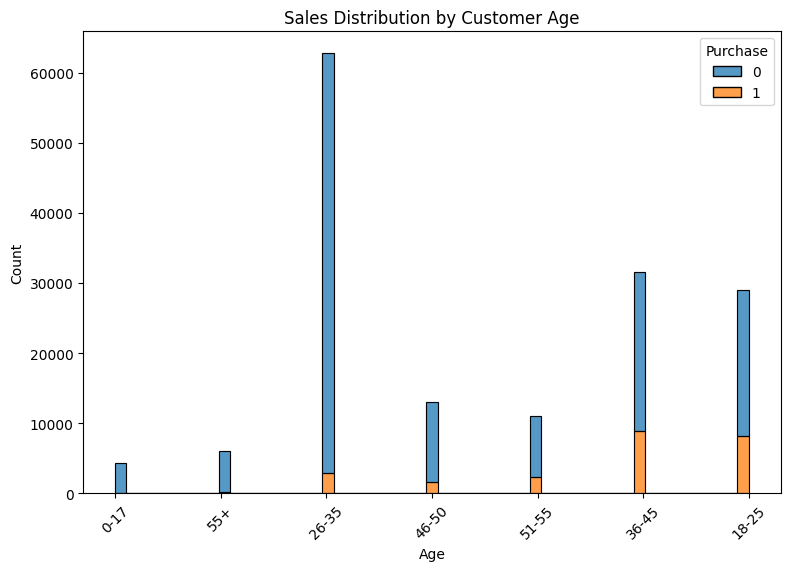

In [16]:
plt.figure(figsize=(9, 6))

# Histogram created with seaborn
sns.histplot(data=df, x='Age', hue='Purchase', multiple='stack', shrink=1)

# Modify the labels below the columns
# Note: Ensure these labels match the factorized integer values 0-6 in your dataset.
new_labels = ['','0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
plt.gca().set_xticklabels(new_labels, rotation=45, ha='center')

plt.title('Sales Distribution by Customer Age')
plt.show()

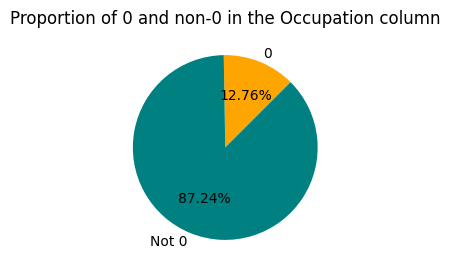

In [17]:
data_column = df['Occupation']

# Count occurrences of 0 and non-0 values in the occupation column
count_0 = data_column.eq(0).sum()
count_non_0 = (data_column != 0).sum()

# Create a DataFrame for analysis
df_analysis = pd.DataFrame({'Value': ['0', 'Not 0'], 'Count': [count_0, count_non_0]})

# Creation of a pie chart
plt.subplots(figsize=(5, 3))
plt.pie(df_analysis['Count'], labels=df_analysis['Value'], autopct='%1.2f%%', startangle=45, colors=['orange', 'teal'])
plt.title('Proportion of 0 and non-0 in the Occupation column')
plt.show()

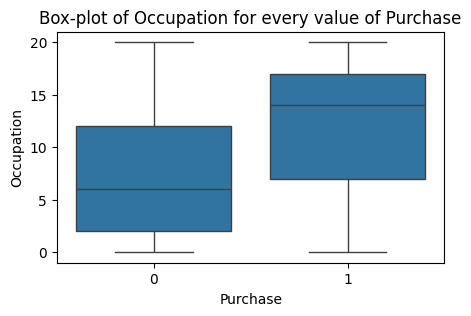

In [18]:
plt.subplots(figsize=(5, 3))
sns.boxplot(x='Purchase', y='Occupation', data=df)
plt.title('Box-plot of Occupation for every value of Purchase')
plt.xlabel('Purchase')
plt.ylabel('Occupation')
plt.show()

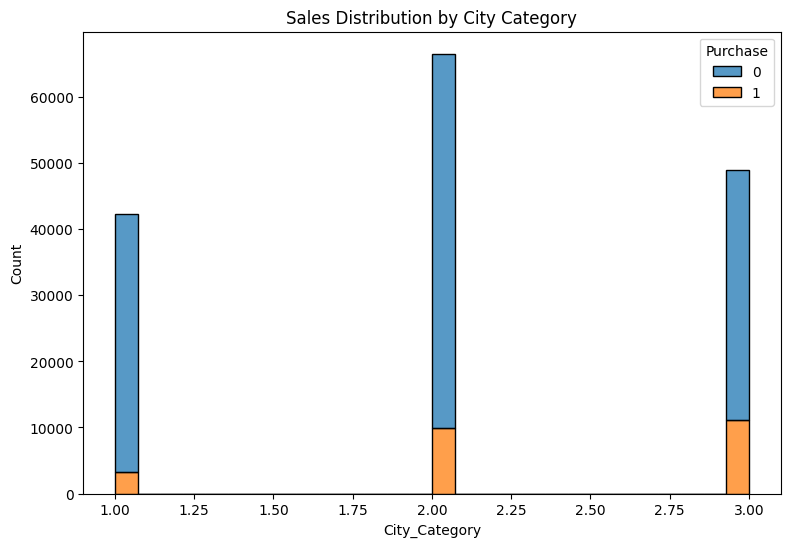

In [19]:
plt.figure(figsize=(9, 6))
sns.histplot(data=df, x='City_Category', hue='Purchase', multiple='stack', shrink=1)
plt.title('Sales Distribution by City Category')
plt.show()

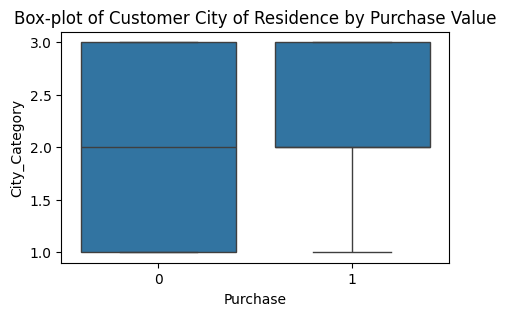

In [20]:
plt.subplots(figsize=(5, 3))
sns.boxplot(x='Purchase', y='City_Category', data=df)
plt.title('Box-plot of Customer City of Residence by Purchase Value')
plt.xlabel('Purchase')
plt.ylabel('City_Category')
plt.show()

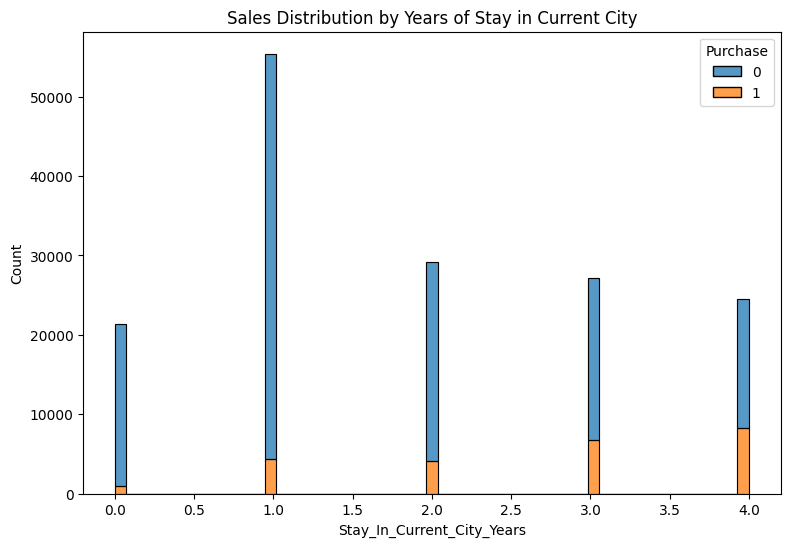

In [21]:
plt.figure(figsize=(9, 6))
sns.histplot(data=df, x='Stay_In_Current_City_Years', hue='Purchase', multiple='stack', shrink=1)
plt.title('Sales Distribution by Years of Stay in Current City')
plt.show()

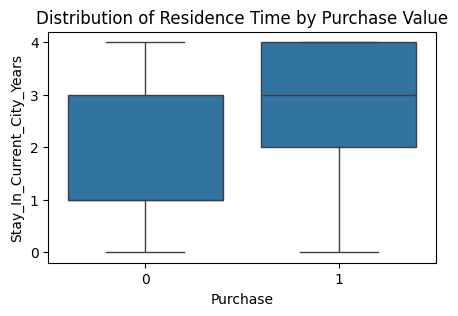

In [22]:
plt.subplots(figsize=(5, 3))
sns.boxplot(x='Purchase', y='Stay_In_Current_City_Years', data=df)
plt.title('Distribution of Residence Time by Purchase Value')
plt.xlabel('Purchase')
plt.ylabel('Stay_In_Current_City_Years')
plt.show()

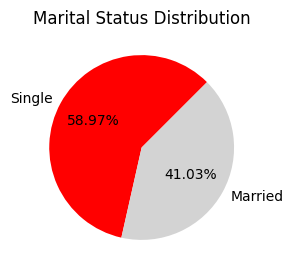

In [23]:
plt.subplots(figsize=(5, 3))

conteggio_categorie = df['Marital_Status'].value_counts()

etichette_personalizzate = ['Single', 'Married']

plt.pie(conteggio_categorie, labels=etichette_personalizzate, autopct='%1.2f%%', startangle=45, colors=['red', 'lightgrey'])
plt.title('Marital Status Distribution')
plt.show()

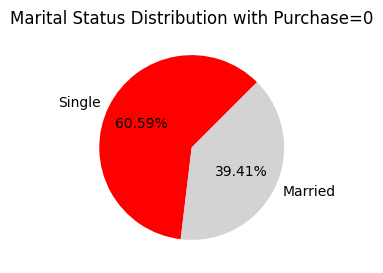

In [24]:
plt.subplots(figsize=(5, 3))

df_purchase_0 = df[df['Purchase'] == 0]

conteggio_genere = df_purchase_0['Marital_Status'].value_counts()

plt.pie(conteggio_genere, labels=['Single','Married'], autopct='%1.2f%%', startangle=45, colors=['red','lightgrey'])
plt.title('Marital Status Distribution with Purchase=0')
plt.show()

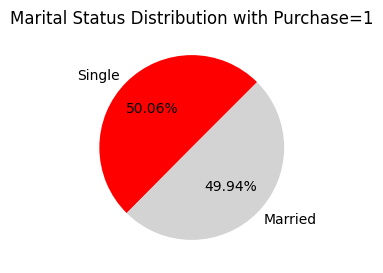

In [25]:
plt.subplots(figsize=(5, 3))

df_purchase_1 = df[df['Purchase'] == 1]

conteggio_genere = df_purchase_1['Marital_Status'].value_counts()

plt.pie(conteggio_genere, labels=['Single','Married'], autopct='%1.2f%%', startangle=45, colors=['red','lightgrey'])
plt.title('Marital Status Distribution with Purchase=1')
plt.show()

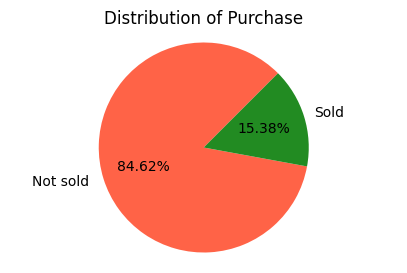

In [26]:
plt.subplots(figsize=(5, 3))

conteggio_categorie = df['Purchase'].value_counts()

etichette_personalizzate = ['Not sold ', 'Sold']

plt.pie(conteggio_categorie, labels=etichette_personalizzate, autopct='%1.2f%%', startangle=45, colors=[ 'tomato', 'forestGreen'])
plt.axis('equal')
plt.title('Distribution of Purchase')
plt.show()

----------------
----------------
# PHASE 3: Learning

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

Entering the processing phase, we eliminate columns superfluous to the calculation; in this case, it will only be the customer ID.

In [28]:
df = pd.read_csv('./dati_modificati_con_prediction.csv')
df = df.drop(['User_ID'], axis=1)

In [29]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase
0,0,0,10,1,2,0,0
1,0,0,10,1,2,0,0
2,0,0,10,1,2,0,0
3,0,0,10,1,2,0,0
4,1,1,16,3,4,0,0


Splitting the dataset in training and testing

In [30]:
Data = df.values
m = 100000
X = Data[:m,:5]
y = Data[:m,6]
# It can be noted that the database has been truncated to 100,000 rows because it is considered a sufficiently large number for the goal of the exercise.

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

It is worth mentioning that during the splitting of the training and learning datasets, the database size was truncated to 100,000 rows, as this is considered a sufficiently large number for this type of exercise.

In [31]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train) #scaled training data
X_test_scaled = scaler.transform(X_test) #scaled test

The model used is SVC (Support Vector Classification), mainly used for classification cases (like this one) and regression.

In [32]:
model = SVC(kernel = 'sigmoid', random_state = 42, gamma = 0.001)
model.fit(X_train_scaled, y_train)

SVC(gamma=0.001, kernel='sigmoid', random_state=42)

We conclude this phase by printing the training error.

In [33]:
print("Training error: ", 1-model.score(X_train_scaled, y_train))

Training error:  0.12272857142857141


And finally, the testing error as well.

In [34]:
predictions = model.predict(X_test)
print("Test error: ", 1 - model.score(X_test_scaled, y_test))

Test error:  0.12183333333333335


----------------
----------------
# PHASE 4: Conclusions

The fact that the Test error gives us 0.1218 means that our model (when we input our required data) will be wrong only 12.18% of the time on a sample of 30,000 rows of features.

Since the training error and the test error differ very little, this suggests that the model is generalizing well to data it has never seen during training.

We can state with certainty that we are not experiencing phenomena of overfitting (a phenomenon where the test error is significantly higher than the training error because the model adapts excessively to the training data) or underfitting (a phenomenon where the test error is notably lower than the training error; the main cause may be that the model has not learned enough from the training data).

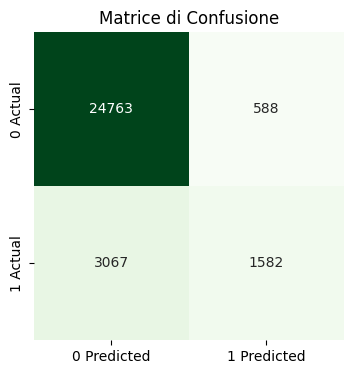

In [36]:

cm = confusion_matrix(y_test, model.predict(X_test_scaled))

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False,
            xticklabels=['0 Predicted', '1 Predicted'],
            yticklabels=['0 Actual', '1 Actual'])

plt.title('Matrice di Confusione')
plt.show()

By analyzing the confusion matrix, we can demonstrate the test error generated in Phase 3 [34]. We note that the total sum of the secondary diagonal (corresponding to total errors) divided by the total sum of the four quadrants (representing the sample size) gives us the result $\frac{3067 + 588}{30000} = 0.12183$, which represents the Test Error value.We can further subdivide the Test Error into the following components:False Positives: situations where the machine incorrectly estimates a value = 1 when the real value is 0. These constitute $\frac{588}{30000} = 0.0196$ (or 1.96%) of the testing cases, or $\frac{588}{3067+588} = 0.1608$ (or 16.08%)  of the total errors.False Negatives: situations where the machine predicts 0 when it is actually 1. These constitute $\frac{3067}{30000} = 0.1022$ (or 10.22%) of the testing cases, or $\frac{3067}{3067+588} = 0.8392$ (or 83.92%) of the total errors.

##### This Machine Learning work, concluded in 2024 by Xavier Andrea Fiabane, is released under the CC-BY-SA license.